In [137]:
import pandas as pd
import datetime
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [138]:
df = pd.read_csv("ecs_series_1_uid_encoded(1).csv")

In [4]:
df.sample(5)

,ds,region_no_factor,iz_no_factor,product_factor,instance_type_name_factor,instance_type_family_factor,vcpu_net_delead,uid
187448,3/29/18 16:00,3,5,1,70,9,0.033333,75771
89478,6/13/18 16:00,3,4,2,48,7,0.044444,1492
302500,11/20/18 16:00,3,5,1,68,9,0.033333,143073
176282,10/2/18 16:00,1,1,3,7,1,-0.042105,22194
144937,8/17/18 16:00,3,5,1,68,9,-0.066667,12886


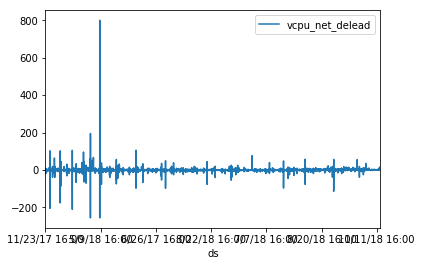

In [7]:
df.plot(x = "ds",y = "vcpu_net_delead")

In [139]:
datetime_object = datetime.datetime.strptime("9/27/18 16:00", "%m/%d/%y %H:%M")
df['Date'] = df["ds"].apply(lambda x:datetime.datetime.strptime(x, "%m/%d/%y %H:%M"))
df['Year'] = df["ds"].apply(lambda x:datetime.datetime.strptime(x, "%m/%d/%y %H:%M").year)
df['Month'] = df["ds"].apply(lambda x:datetime.datetime.strptime(x, "%m/%d/%y %H:%M").month) 
df['Day'] = df["ds"].apply(lambda x:datetime.datetime.strptime(x, "%m/%d/%y %H:%M").day) 

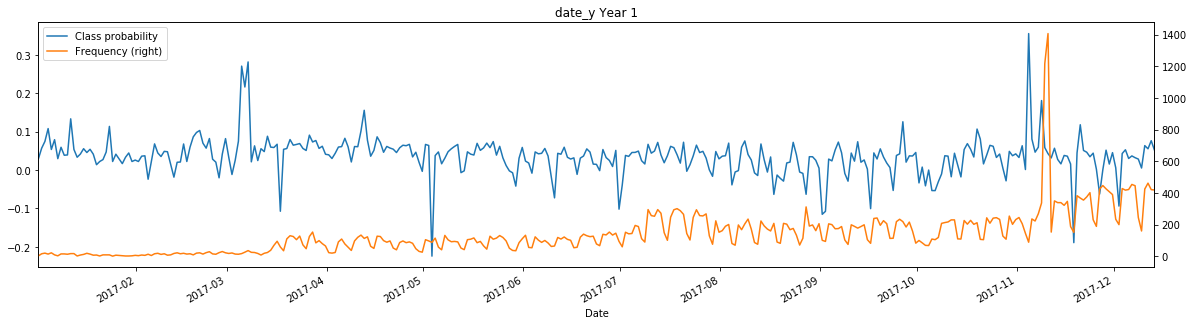

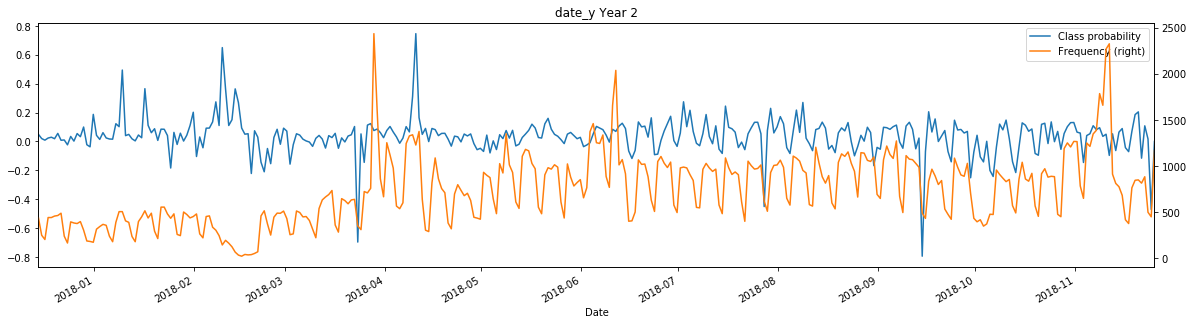

In [127]:
date_y = pd.DataFrame()
date_y['Class probability'] = df.groupby('Date')['vcpu_net_delead'].mean()
date_y['Frequency'] = df.groupby('Date')['vcpu_net_delead'].size()
i = int(len(date_y) / 2)
date_y[:i].plot(secondary_y='Frequency', figsize=(20, 5), title='date_y Year 1')
date_y[i:].plot(secondary_y='Frequency', figsize=(20, 5), title='date_y Year 2')

3    185961
1     52813
2     43336
4     21082
Name: region_no_factor, dtype: int64


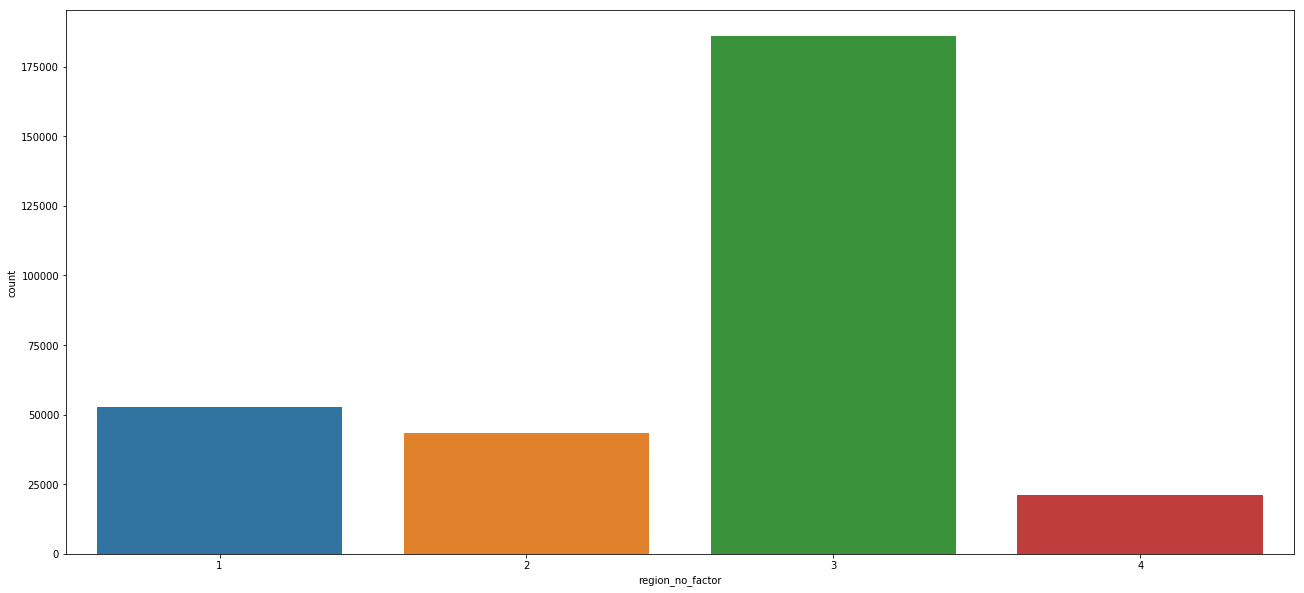

In [141]:
print(df['region_no_factor'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(df['region_no_factor'])
plt.show()

5    140785
4     45176
3     43336
2     27235
1     25578
6     21082
Name: iz_no_factor, dtype: int64


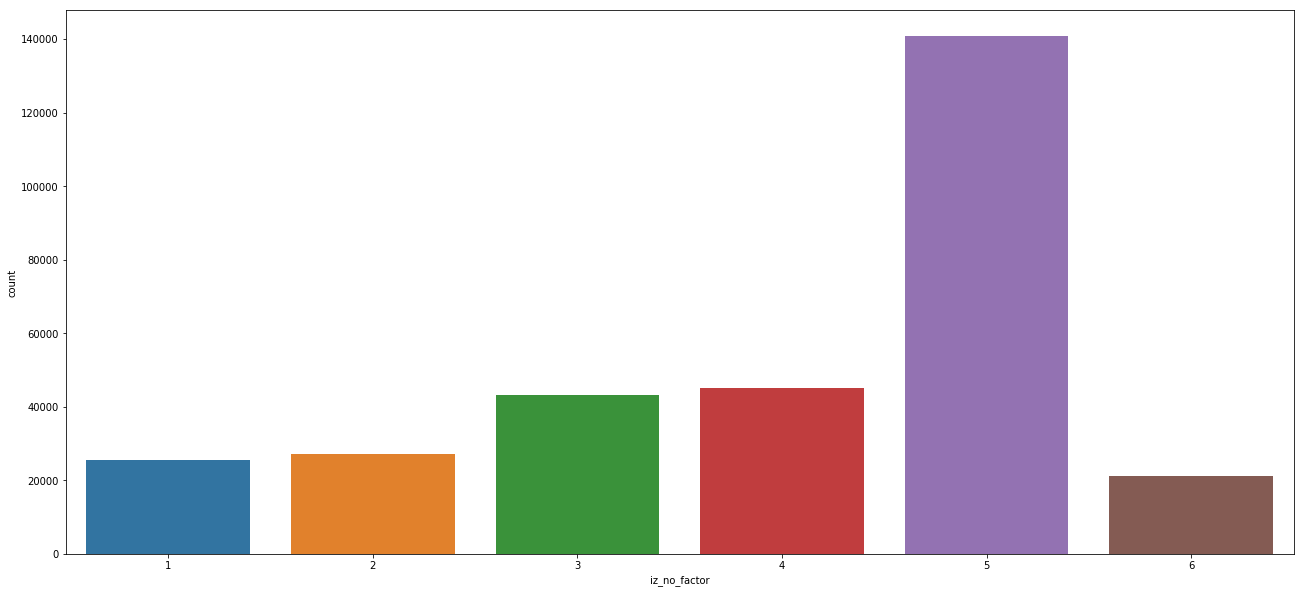

In [142]:
print(df['iz_no_factor'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(df['iz_no_factor'])
plt.show()

1    140785
3     96149
2     66258
Name: product_factor, dtype: int64


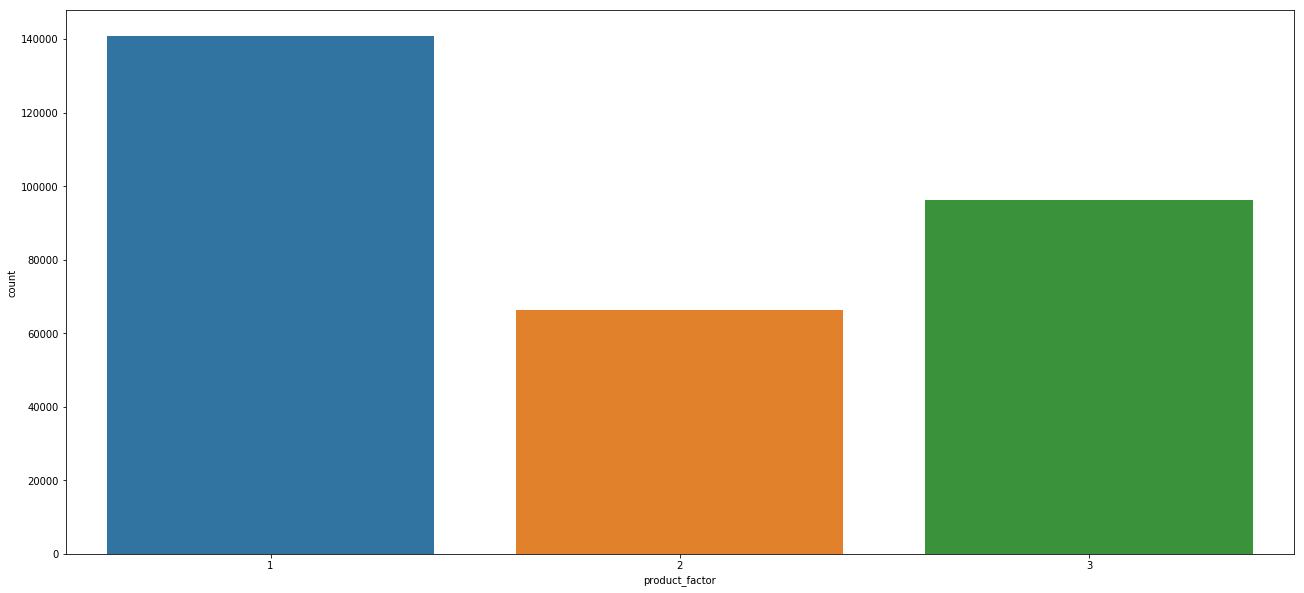

In [143]:
print(df['product_factor'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(df['product_factor'])
plt.show()

9    140785
1     48714
7     45928
2     40058
8     15528
5      5480
6      4802
4      1863
3        34
Name: instance_type_family_factor, dtype: int64


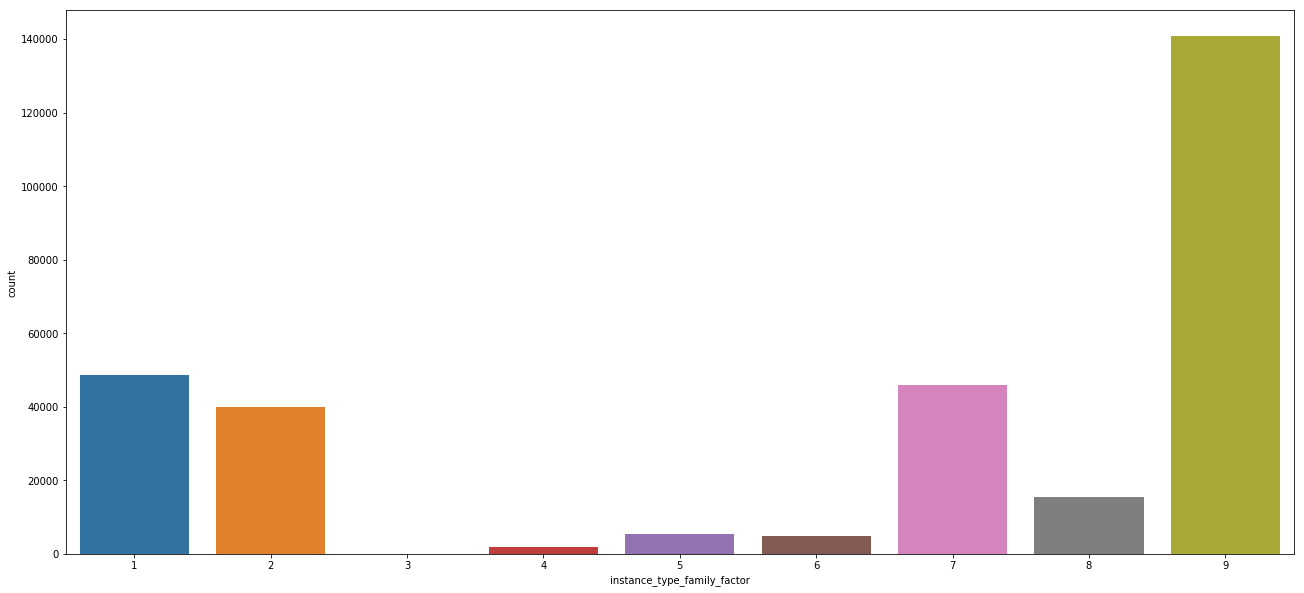

In [144]:
print(df['instance_type_family_factor'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(df['instance_type_family_factor'])
plt.show()

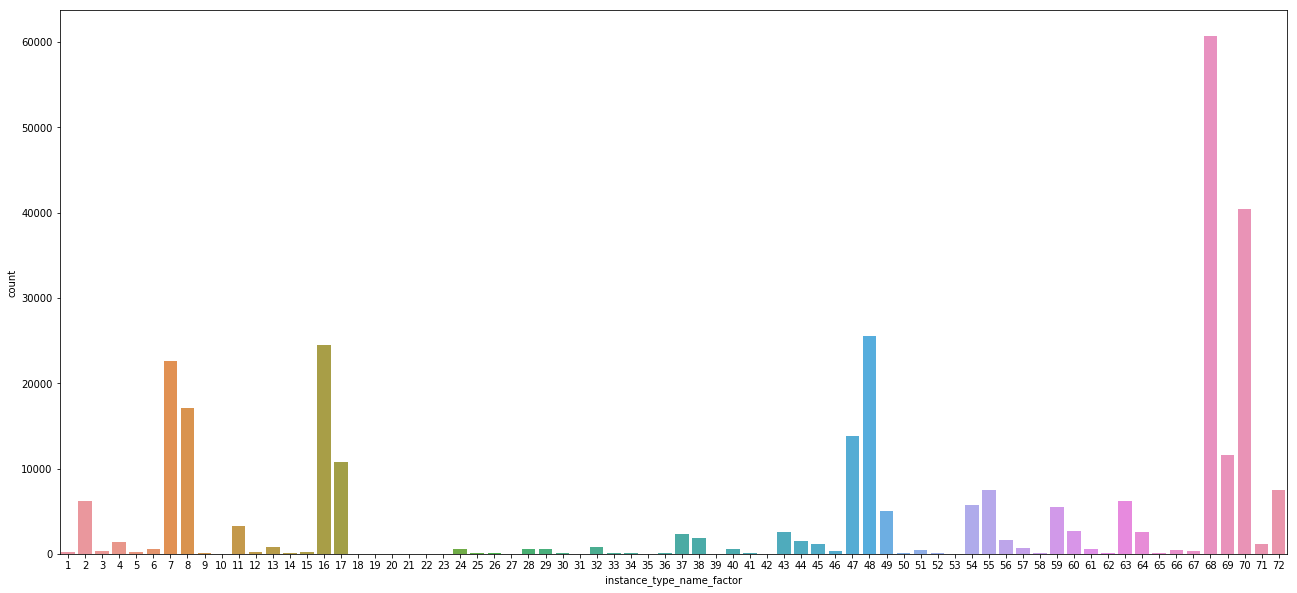

In [145]:
plt.figure(figsize=(22,10))
sns.countplot(df['instance_type_name_factor'])
plt.show()

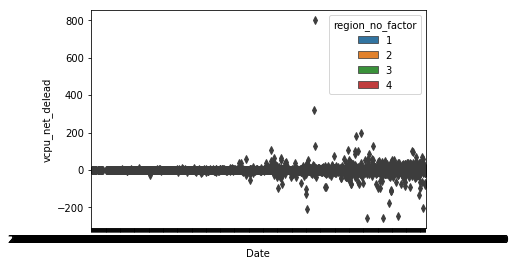

In [136]:
#date_y = pd.DataFrame()
#date_y['Class probability'] = df.groupby('region_no_factor')['vcpu_net_delead'].mean()
#date_y['Frequency'] = df.groupby('region_no_factor')['vcpu_net_delead'].size()
#date_y.plot(secondary_y='Frequency', figsize=(20, 5), title='date_y Year 2')
sns.boxplot(x=df["Date"],y=df["vcpu_net_delead"],hue=df['region_no_factor'])

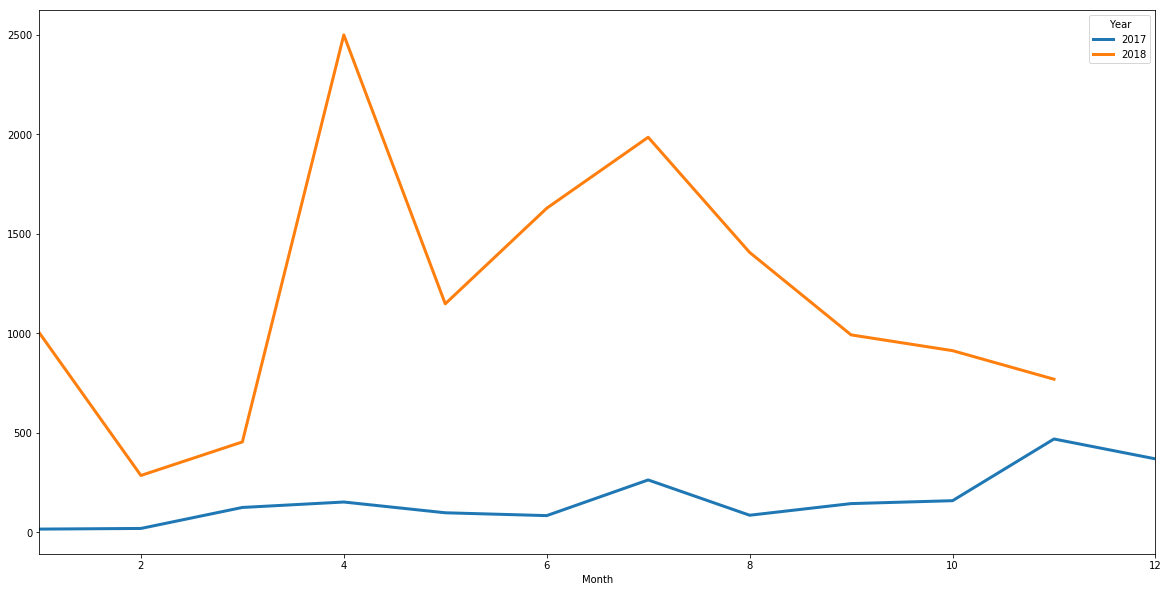

In [75]:
spivot = pd.pivot_table(df, index='Month', columns = 'Year', values = 'vcpu_net_delead', aggfunc=np.sum)
spivot.plot(figsize=(20,10), linewidth=3)
plt.show()

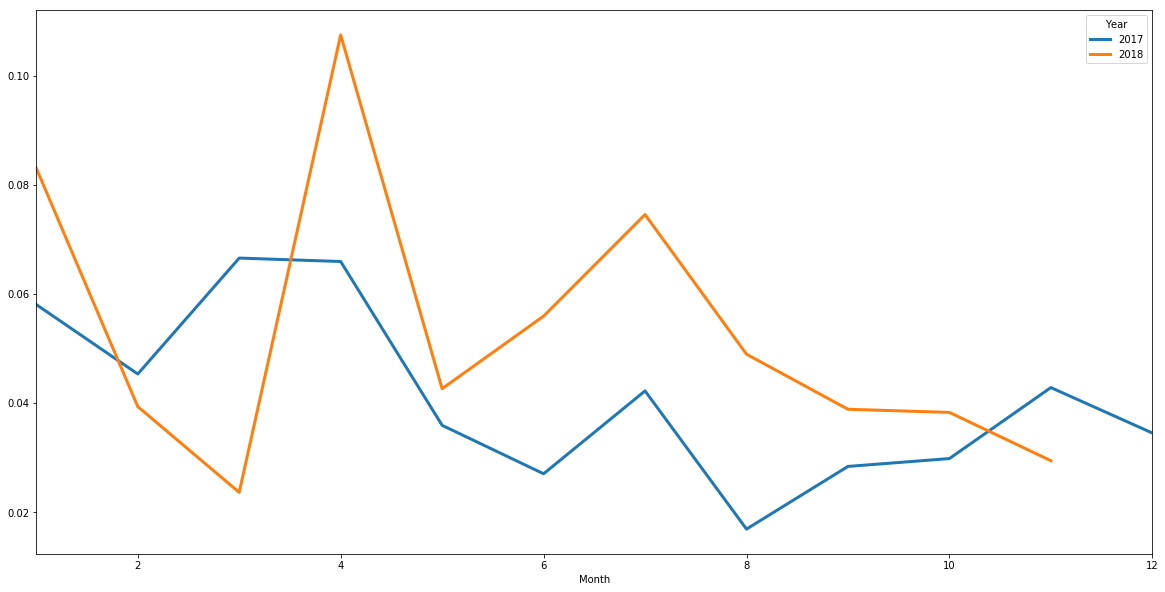

In [76]:
spivot = pd.pivot_table(df, index='Month', columns = 'Year', values = 'vcpu_net_delead', aggfunc=np.mean)
spivot.plot(figsize=(20,10), linewidth=3)
plt.show()

### Average purchase doesn't change much, total net amount of cpu has increased

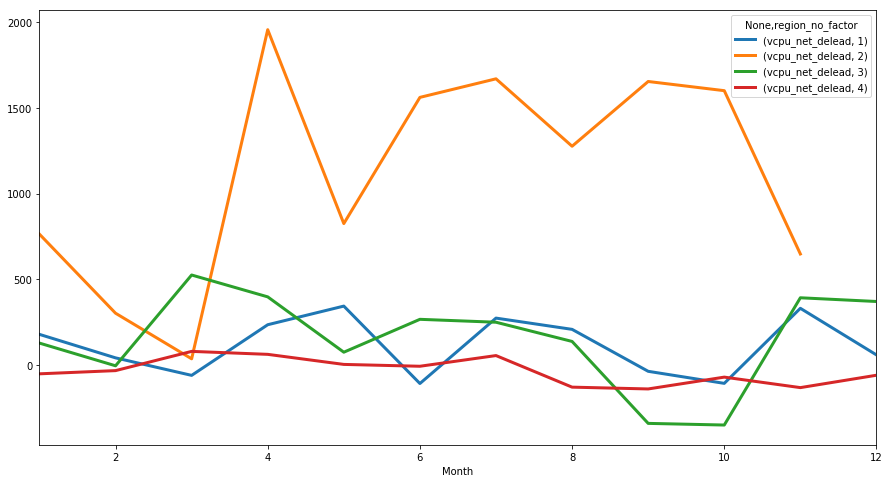

In [80]:
region_list = ['1', '2', '3', '4']
region_series = pd.DataFrame(df[(df['region_no_factor'].isin(region_list))][['Month','region_no_factor','vcpu_net_delead']].dropna().
    groupby(['Month', 'region_no_factor']).sum().unstack())
region_series.plot(figsize=(15,8), linewidth=3)
plt.show()

In [94]:
df.describe()

,region_no_factor,iz_no_factor,product_factor,instance_type_name_factor,instance_type_family_factor,vcpu_net_delead,uid,Year,Month,Day
count,303192.000000,303192.000000,303192.000000,303192.000000,303192.000000,303192.000000,303192.000000,303192.000000,303192.000000,303192.000000
mean,2.578221,4.027735,1.852780,46.233875,6.284404,0.049724,63915.149483,2017.820935,7.063402,15.581071
std,0.855179,1.415351,0.871662,24.682197,3.260205,2.455232,45507.375547,0.383407,2.949258,8.776853
min,1.000000,1.000000,1.000000,1.000000,1.000000,-256.000000,1.000000,2017.000000,1.000000,1.000000
25%,2.000000,3.000000,1.000000,16.000000,2.000000,-0.022222,21866.000000,2018.000000,5.000000,8.000000
50%,3.000000,5.000000,2.000000,54.000000,8.000000,0.033333,58621.500000,2018.000000,7.000000,15.000000
75%,3.000000,5.000000,3.000000,68.000000,9.000000,0.066667,102163.000000,2018.000000,10.000000,23.000000
max,4.000000,6.000000,3.000000,72.000000,9.000000,800.000000,152691.000000,2018.000000,12.000000,31.000000


In [95]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303192 entries, 0 to 303191
Data columns (total 11 columns):
ds                             303192 non-null object
region_no_factor               303192 non-null int64
iz_no_factor                   303192 non-null int64
product_factor                 303192 non-null int64
instance_type_name_factor      303192 non-null int64
instance_type_family_factor    303192 non-null int64
vcpu_net_delead                303192 non-null float64
uid                            303192 non-null int64
Year                           303192 non-null int64
Month                          303192 non-null int64
Day                            303192 non-null int64
dtypes: float64(1), int64(9), object(1)
memory usage: 25.4+ MB


In [96]:
df.shape 

(303192, 11)

In [97]:
df.skew() 

region_no_factor                -0.745921
iz_no_factor                    -0.806081
product_factor                   0.289215
instance_type_name_factor       -0.591575
instance_type_family_factor     -0.710001
vcpu_net_delead                107.156561
uid                              0.337776
Year                            -1.674133
Month                           -0.214088
Day                              0.066542
dtype: float64

In [98]:
df.kurt()

region_no_factor                  -0.382022
iz_no_factor                      -0.449510
product_factor                    -1.622893
instance_type_name_factor         -1.285753
instance_type_family_factor       -1.267081
vcpu_net_delead                40233.152386
uid                               -1.125476
Year                               0.802728
Month                             -0.895474
Day                               -1.210365
dtype: float64

In [99]:
df.get_dtype_counts()

float64    1
int64      9
object     1
dtype: int64

In [102]:
# Finding NaN
for c in df.columns:
  num_na = df[c].isnull().sum()
  if num_na > 0:
    print (round(num_na / float(len(df)), 3), '|', c)

Text(0.5,0,'Total Sales')

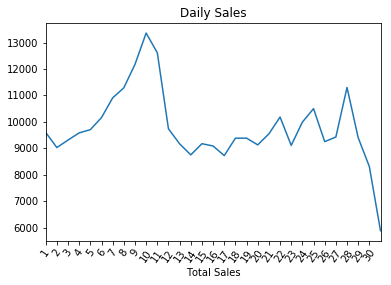

In [90]:
sales_by_day = df.groupby("Day").size()
plot_by_day = sales_by_day.plot(title = "Daily Sales",xticks=(range(1,31)),rot=55)
plot_by_day.set_xlabel("Day")
plot_by_day.set_xlabel("Total Sales")


In [103]:
df.corr()

,region_no_factor,iz_no_factor,product_factor,instance_type_name_factor,instance_type_family_factor,vcpu_net_delead,uid,Year,Month,Day
region_no_factor,1.000000,0.957706,-0.742405,0.792406,0.826018,-0.014261,0.546398,-0.319742,0.001322,-0.012912
iz_no_factor,0.957706,1.000000,-0.839695,0.853510,0.867544,-0.015430,0.670760,-0.194625,-0.017559,-0.019825
product_factor,-0.742405,-0.839695,1.000000,-0.967207,-0.954926,0.023398,-0.588922,-0.031223,0.011788,0.031108
instance_type_name_factor,0.792406,0.853510,-0.967207,1.000000,0.991757,-0.025130,0.546469,-0.059837,-0.009132,-0.030033
instance_type_family_factor,0.826018,0.867544,-0.954926,0.991757,1.000000,-0.024544,0.522574,-0.113742,-0.005788,-0.025750
vcpu_net_delead,-0.014261,-0.015430,0.023398,-0.025130,-0.024544,1.000000,-0.009435,0.002483,-0.004232,-0.003334
uid,0.546398,0.670760,-0.588922,0.546469,0.522574,-0.009435,1.000000,0.108040,0.105822,-0.036644
Year,-0.319742,-0.194625,-0.031223,-0.059837,-0.113742,0.002483,0.108040,1.000000,-0.286747,-0.037054
Month,0.001322,-0.017559,0.011788,-0.009132,-0.005788,-0.004232,0.105822,-0.286747,1.000000,-0.061019
Day,-0.012912,-0.019825,0.031108,-0.030033,-0.025750,-0.003334,-0.036644,-0.037054,-0.061019,1.000000


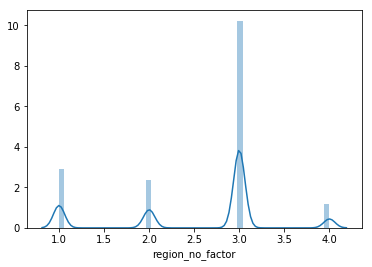

In [105]:
# single column
sns.distplot(df['region_no_factor'].dropna())

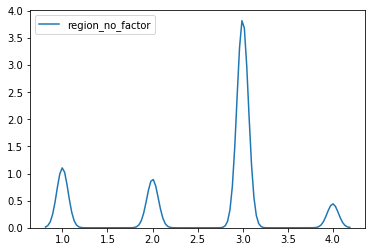

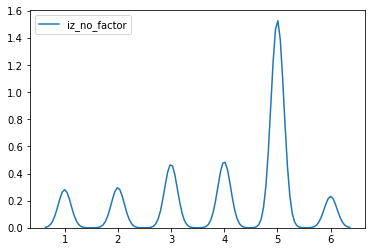

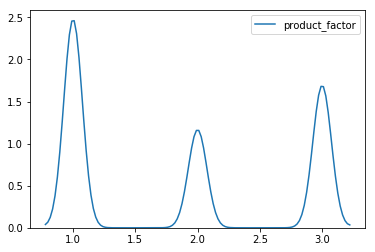

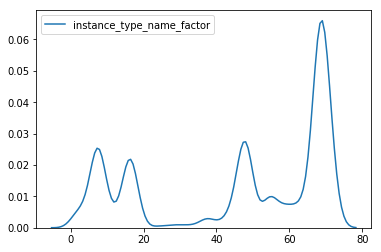

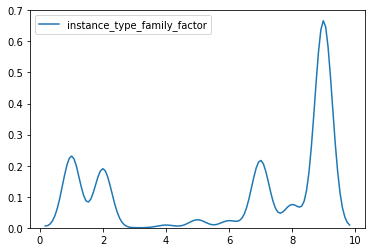

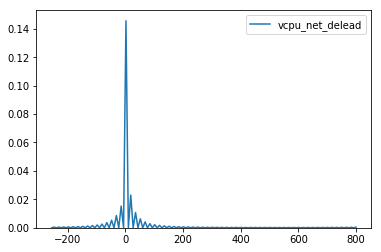

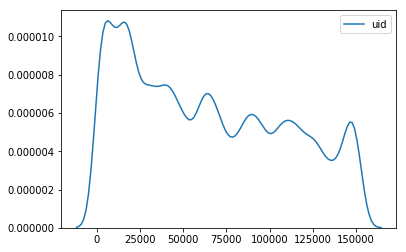

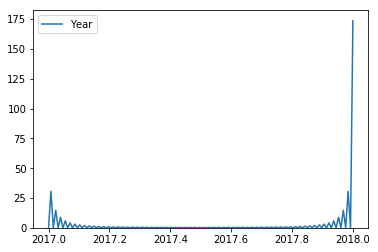

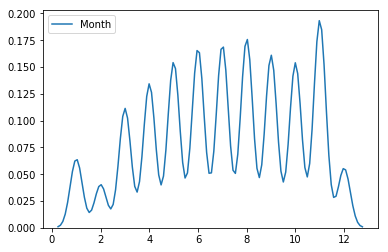

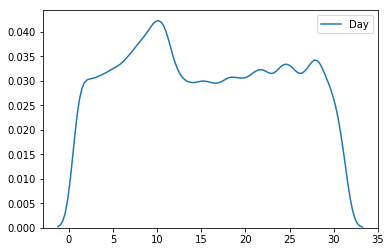

In [113]:
# all numeric columns
for c in df.columns:
  if df[c].dtype in ['int64', 'float64','str']:
    sns.kdeplot(df[c].dropna())
    plt.show()

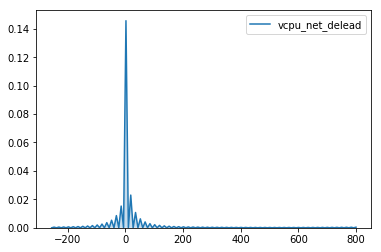

In [111]:
# all continuous variables
for c in df.columns:
  if df[c].dtype in ['float64']:
    sns.kdeplot(df[c].dropna(), shade=True)
    plt.show()

Text(0.5,0,'Total Sales')

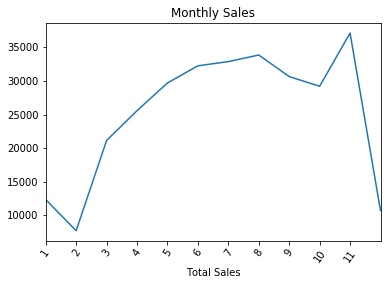

In [92]:
sales_by_day = df.groupby("Month").size()
plot_by_day = sales_by_day.plot(title = "Monthly Sales",xticks=(range(1,12)),rot=55)
plot_by_day.set_xlabel("Month")
plot_by_day.set_xlabel("Total Sales")

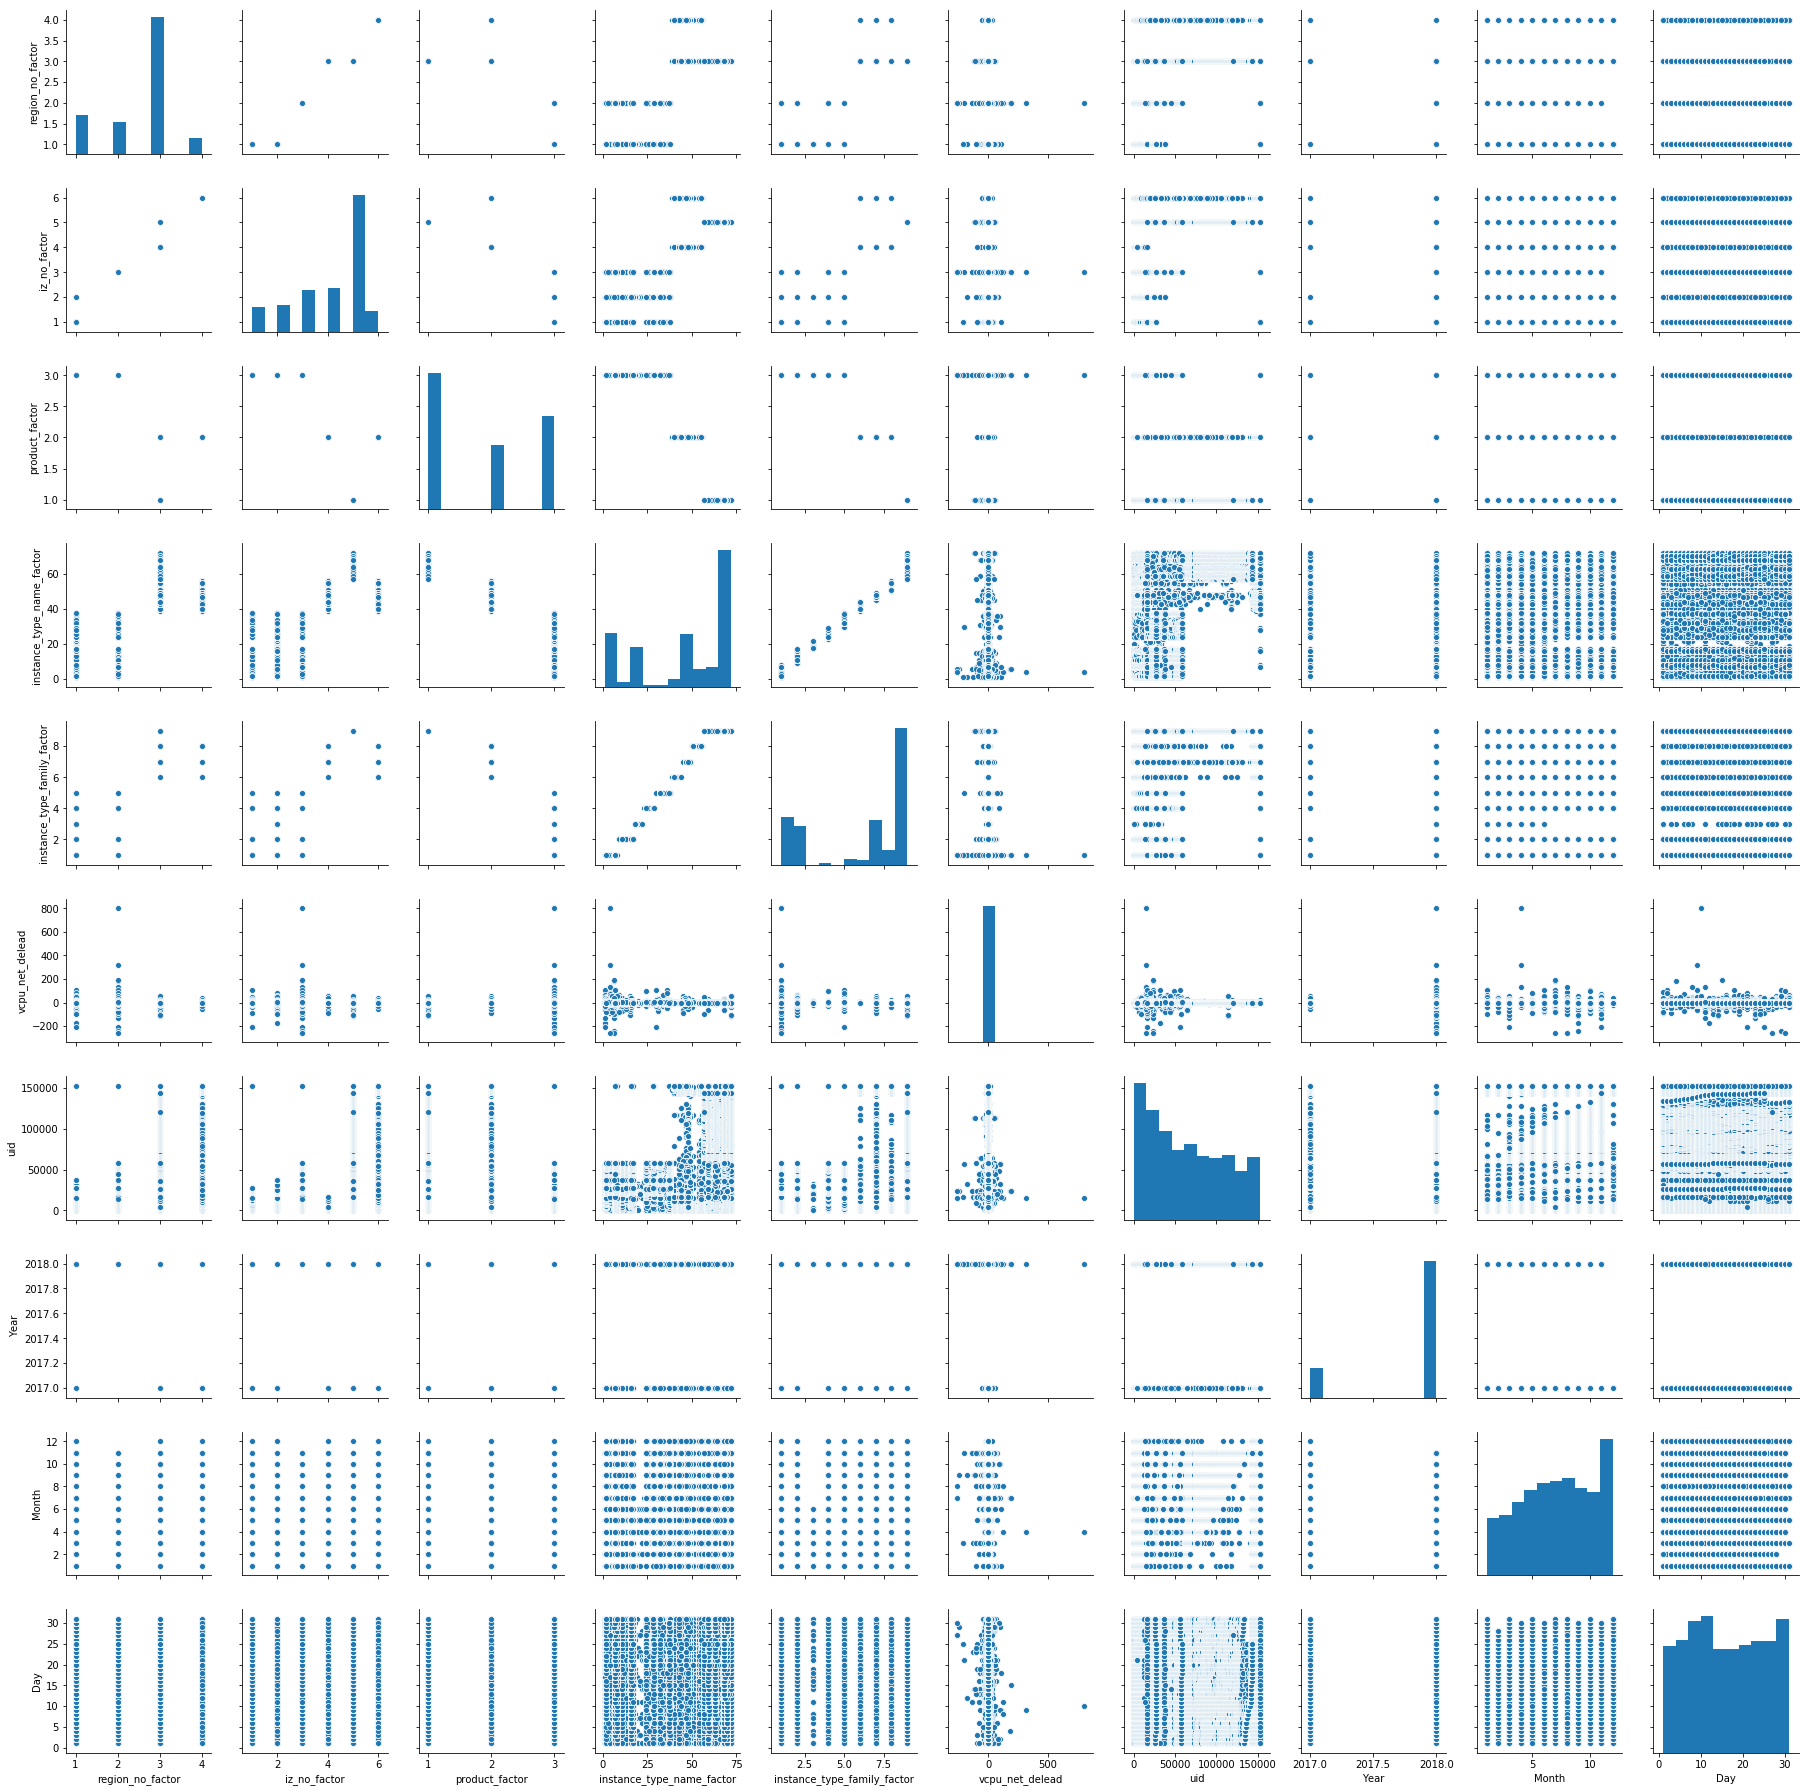

In [114]:
sns.pairplot(df.dropna())